# 基本图形

In [27]:
import matplotlib;print('matplotlib版本：', matplotlib.__version__)
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

matplotlib版本： 3.3.0


## 条形图

In [28]:
df = pd.read_csv('Arthritis.csv', index_col=0)
df.head()

,ID,Treatment,Sex,Age,Improved
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked


### 简单的条形图

In [29]:
counts = df.Improved.value_counts()
counts

None      42
Marked    28
Some      14
Name: Improved, dtype: int64

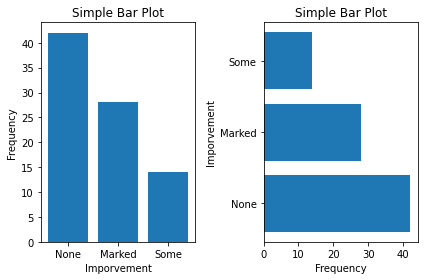

In [30]:
fig, ax = plt.subplots(1,2)

ax[0].bar(counts.index, counts.values)
ax[0].set_title('Simple Bar Plot')
ax[0].set_xlabel('Imporvement')
ax[0].set_ylabel('Frequency')

ax[1].barh(counts.index, counts.values)
ax[1].set_title('Simple Bar Plot')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Imporvement')

plt.tight_layout() # 自动调整间距

### 堆砌条形图和分组条形图

In [31]:
counts = pd.crosstab(df.Improved, df.Treatment)
counts

Treatment,Placebo,Treated
Improved,,
Marked,7,21
None,29,13
Some,7,7


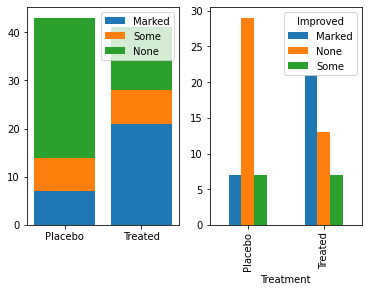

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

x = counts.columns
y1 = counts.loc['Marked', :]
y2 = counts.loc['Some', :]
y3 = counts.loc['None', :]
plt.bar(x, y1, label='Marked')
plt.bar(x, y2, bottom=y1, label='Some')
plt.bar(x, y3, bottom=y1+y2, label='None')
plt.legend()

ax2 = fig.add_subplot(122)

counts.T.plot(kind='bar', ax=ax2);

### 均值条形图

In [33]:
state_x77 = pd.read_csv('state_x77.csv')
state_region = pd.read_csv('state_region.csv')

In [34]:
state_x77.head()

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361


In [35]:
state_region.head()

,x
1,South
2,West
3,West
4,South
5,West


In [36]:
states = state_x77.copy()
states['region'] = state_region.values
means = states.groupby('region').agg({'Illiteracy':'mean'})
means

,Illiteracy
region,
North Central,0.700000
Northeast,1.000000
South,1.737500
West,1.023077


In [37]:
means.sort_values(by='Illiteracy', inplace=True)
means

,Illiteracy
region,
North Central,0.700000
Northeast,1.000000
West,1.023077
South,1.737500


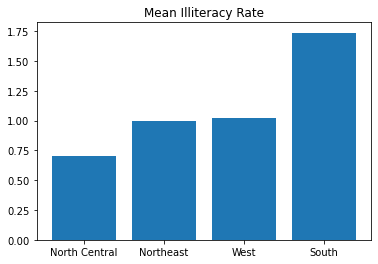

In [38]:
plt.bar(means.index, means.Illiteracy)
plt.title('Mean Illiteracy Rate');

### 条形图的微调

E:\Miniconda\envs\env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


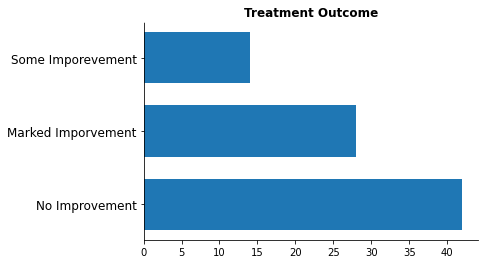

In [39]:
counts = df.Improved.value_counts()
fig, ax = plt.subplots()
ax.barh(counts.index, counts.values, height=0.7)
ax.set_yticklabels(['No Improvement', 'Marked Imporvement', 'Some Imporevement'], fontsize=12)
ax.set_title('Treatment Outcome', weight='bold')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

### **棘状图

## *饼图

In [40]:
slices = np.array([10, 12,4, 16, 8])
lbls = ["US", "UK", "Australia", "Germany", "France"]
pct = np.round(slices/sum(slices)*100).astype(int)
lbls2 = list(map(lambda x: str(x) + " %", pct.tolist()))

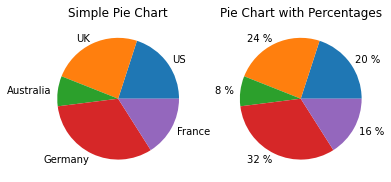

In [41]:
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.pie(slices, labels=lbls)
plt.title('Simple Pie Chart')

fig.add_subplot(1,2,2)
plt.pie(slices, labels=lbls2)
plt.title('Pie Chart with Percentages');

## *直方图

In [42]:
mc = pd.read_csv('mtcars.csv', index_col=0)
mc.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [43]:
import seaborn as sns

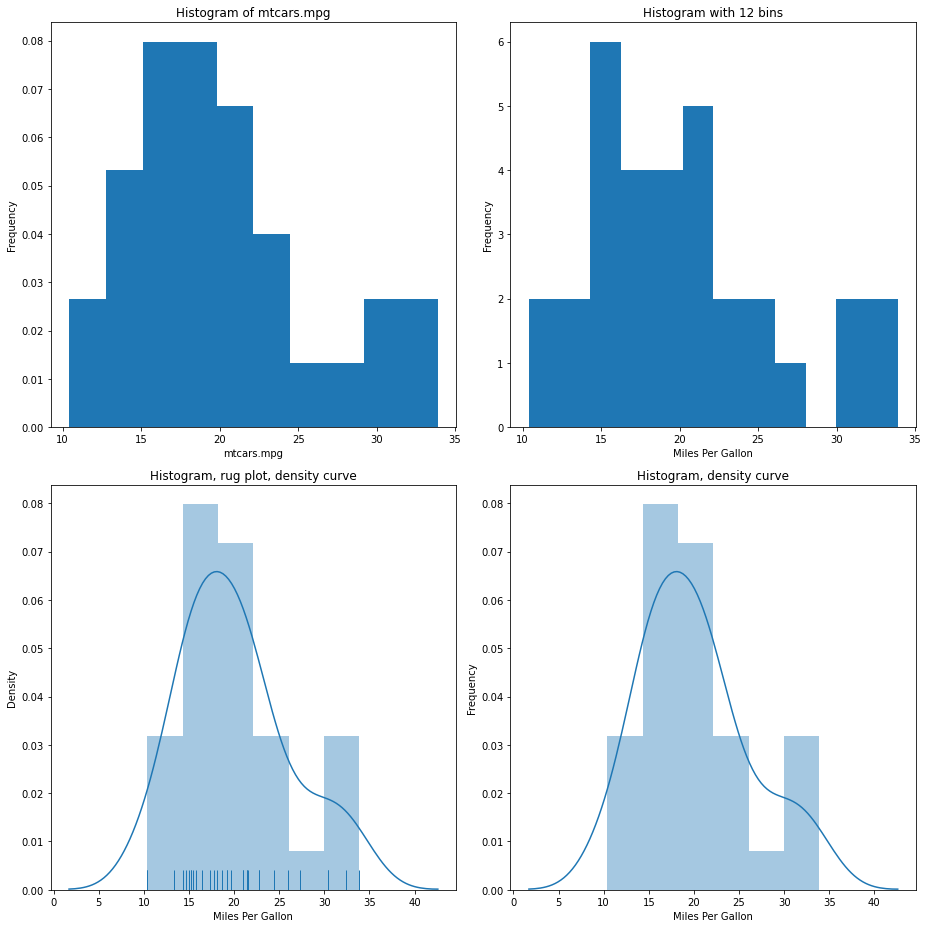

In [44]:
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
plt.hist(mc.mpg, density=True)
plt.xlabel('mtcars.mpg')
plt.ylabel('Frequency')
plt.title('Histogram of mtcars.mpg')

plt.subplot(2,2,2)
plt.hist(mc.mpg, bins=12)
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.title('Histogram with 12 bins')

plt.subplot(2,2,3)
sns.distplot(mc.mpg, rug=True)
plt.xlabel('Miles Per Gallon')
plt.ylabel('Density')
plt.title('Histogram, rug plot, density curve')

plt.subplot(2,2,4)
sns.distplot(mc.mpg)
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.title('Histogram, density curve')
plt.tight_layout() 

## *核密度图

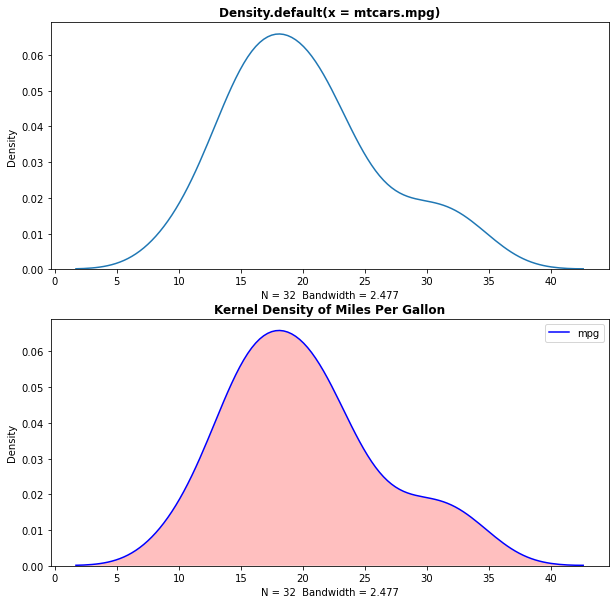

In [45]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,1,1)
sns.distplot(mc.mpg, hist=False, kde=True)
plt.xlabel('N = 32  Bandwidth = 2.477')
plt.ylabel('Density')
plt.title('Density.default(x = mtcars.mpg)', weight='bold')

fig.add_subplot(2,1,2)
sns.kdeplot(mc.mpg, shade=True, color='blue', facecolor='red')
plt.xlabel('N = 32  Bandwidth = 2.477')
plt.ylabel('Density')
plt.title('Kernel Density of Miles Per Gallon', weight='bold');

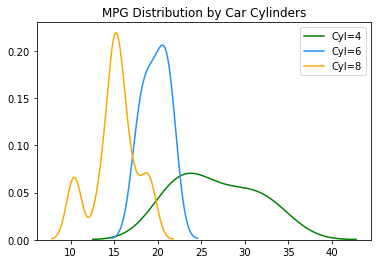

In [46]:
sns.kdeplot(mc.loc[mc['cyl'] == 4, "mpg"], color="g", label="Cyl=4")
sns.kdeplot(mc.loc[mc['cyl'] == 6, "mpg"], color="dodgerblue", label="Cyl=6")
sns.kdeplot(mc.loc[mc['cyl'] == 8, "mpg"], color="orange", label="Cyl=8")
plt.title('MPG Distribution by Car Cylinders');

## *箱线图

### 使用并列箱线图进行跨组比较

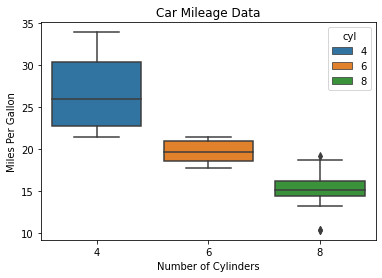

In [47]:
sns.boxplot(x='cyl', y='mpg', hue='cyl', data=mc, dodge=False)
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon')
plt.title('Car Mileage Data');

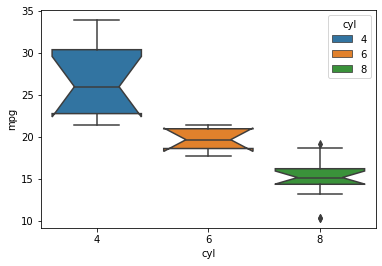

In [48]:
sns.boxplot(x='cyl', y='mpg', hue='cyl', data=mc, notch=True, dodge=False);

### 小提琴图

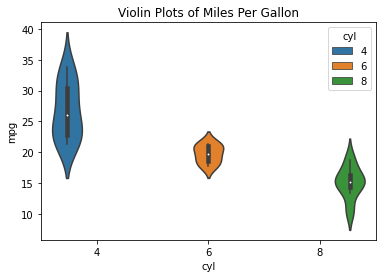

In [52]:
sns.violinplot(x='cyl', y='mpg', data=mc, hue='cyl')
plt.title('Violin Plots of Miles Per Gallon');

## 点图

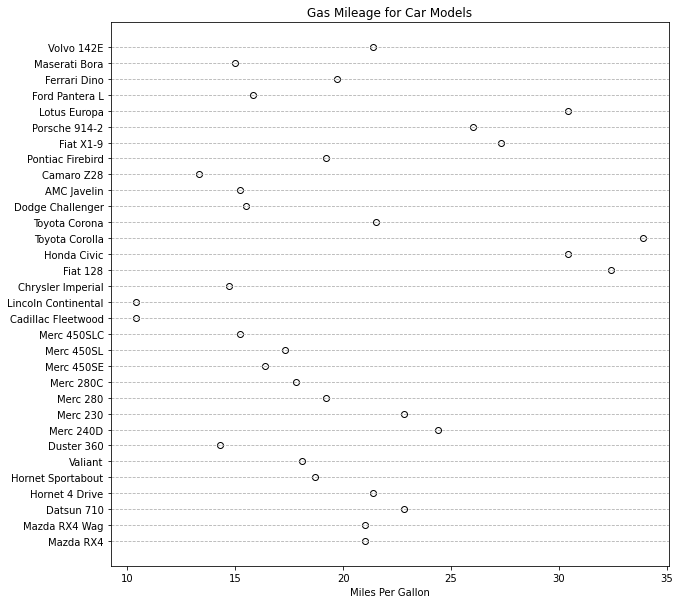

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(mc.mpg, mc.index, c='white', ec='black')
plt.grid(axis='y', ls='--')
plt.xlabel('Miles Per Gallon')
plt.title('Gas Mileage for Car Models');

In [77]:
temp = mc.sort_values(by='mpg')
x = temp.query("cyl == 8")
x.append(temp.query("cyl == 6"))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


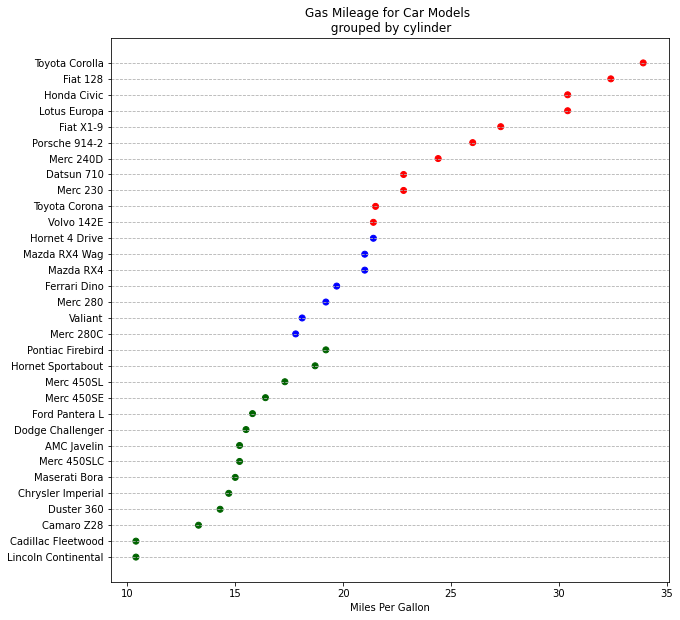

In [80]:
plt.figure(figsize=(10,10))
temp = mc.sort_values(by='mpg')
x = temp.query("cyl == 8")
for i in [6, 4]:
    x = x.append(temp.query(f"cyl == {i}"))

color_dict = {4: 'red',
              6: 'blue',
              8: 'darkgreen'}
x['color'] = mc.cyl.map(color_dict)

plt.scatter(x.mpg, x.index, c=x.color)
plt.title('Gas Mileage for Car Models \n grouped by cylinder')
plt.xlabel('Miles Per Gallon')
plt.grid(axis='y', ls='--')